# K Means Clustering

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.metrics.cluster import completeness_score, homogeneity_score, v_measure_score

## Loading Iris Dataset and creating dataframe

In [2]:
iris = datasets.load_iris()
features = pd.DataFrame(iris.data, columns=iris.feature_names)
target = iris.target

df_iris = features.copy()
df_iris['target'] = target.copy()

df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Visualising how the data is divided between the 3 classes

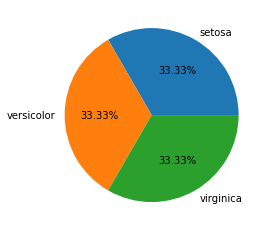

In [4]:
df_copy = features.copy()
df_copy['target'] = target
classes = df_copy.groupby('target')['target'].count()

plt.pie(classes, labels=iris.target_names, autopct='%.2f%%')
plt.show()

## Distributions

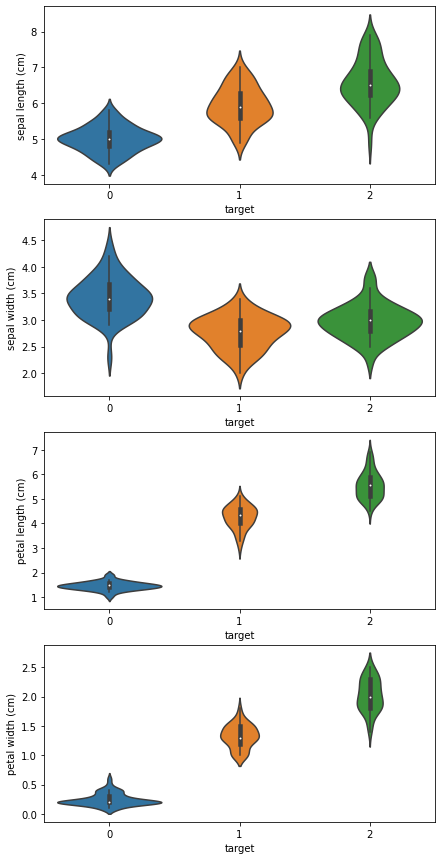

In [5]:
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(7, 15)
p1 = sns.violinplot(x='target', y='sepal length (cm)', data=df_copy, ax=axs[0])
p2 = sns.violinplot(x='target', y='sepal width (cm)', data=df_copy, ax=axs[1])
p3 = sns.violinplot(x='target', y='petal length (cm)', data=df_copy, ax=axs[2])
p4 = sns.violinplot(x='target', y='petal width (cm)', data=df_copy, ax=axs[3])

## Checking correlation with the TARGET and selecting highly correlated ones.

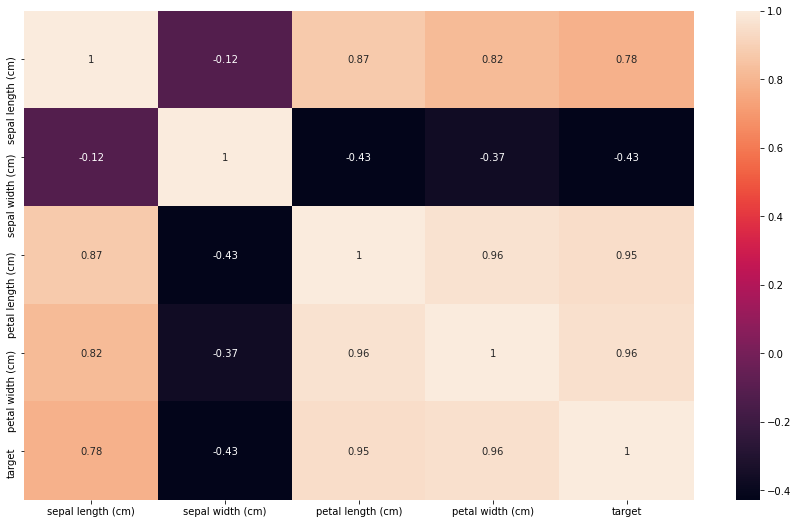

In [6]:
cor_mat = df_iris.corr()
# cor_mat = features[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 9)
sns.heatmap(cor_mat, annot=True)
plt.show()

## Standardising the Data

In [7]:
standardized = scale(features)
df_std = pd.DataFrame(standardized, columns=features.columns)
df_std['target'] = target.copy() 
df_std.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


## Train Test Split

In [8]:
train_x, test_x, train_y, test_y = train_test_split(df_std[['petal length (cm)']], target, test_size=0.05)

## Creating and training K-Means Model

### Checking for 10 different value of 'k' to see which gives lower varience

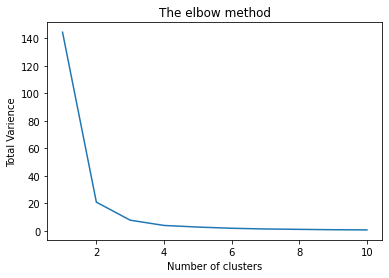

In [9]:
t_var = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(train_x)
    t_var.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), t_var)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Total Varience') #within cluster sum of squares
plt.show()

### FInally creating for k=3

In [14]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(train_x)

predicted_y = kmeans.predict(test_x)

print('Model Labels : \n', kmeans.labels_)
print('\nModel Centers : \n', kmeans.cluster_centers_)

Model Labels : 
 [2 2 2 0 0 2 2 2 1 2 1 2 2 1 2 2 2 1 1 0 2 1 0 2 2 0 2 0 2 0 0 2 0 2 2 0 1
 0 2 0 0 1 2 1 2 0 2 0 1 0 1 1 2 1 2 1 1 2 1 2 2 0 2 1 0 0 0 0 1 1 1 2 1 1
 0 0 1 0 2 0 2 1 1 1 1 0 2 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2
 2 0 2 2 2 0 1 1 2 0 1 0 2 1 1 0 0 1 1 1 1 0 1 2 1 1 0 1 1 2 0]

Model Centers : 
 [[ 1.02838624]
 [-1.30351902]
 [ 0.26764113]]


## Completeness, Homogeneity and V Measure

In [15]:
c_score = completeness_score(test_y, predicted_y)
print('Model Completeness Score : ', c_score)

h_score = homogeneity_score(test_y, predicted_y)
print('Model Homogeneity Score : ', h_score)

v_score = v_measure_score(test_y, predicted_y)
print('Model V-Measure Score : ', v_score)

Model Completeness Score :  1.0
Model Homogeneity Score :  1.0
Model V-Measure Score :  1.0
